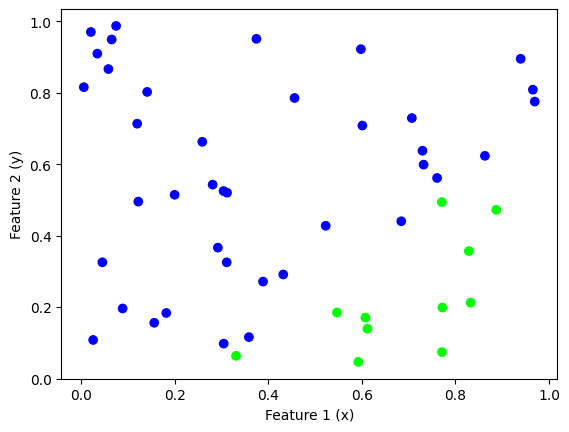

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

"""
np.random.seed(42) sets the seed for the NumPy pseudorandom number generator,
 which is used to generate random numbers in the script.
   By setting the seed to a fixed value (in this case, 42),
     we can ensure that the same sequence of random numbers is generated each time the script is run.
       This can be useful for testing and debugging purposes, 
       as it allows us to reproduce the same results each time we run the code.
"""
# generate some synthetic data
np.random.seed(42)
N = 50
X = np.random.rand(N, 2) # generated number is between 0...1
y = np.zeros(N) # allocating a new array with the same length as X
thresh_hold = 0.25
y[(X[:, 0] - X[:, 1] > thresh_hold)] = 1 

"""
 [0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]

 [0.37454012 0.73199394 0.15601864 0.05808361 0.60111501 0.02058449]

 I did not know you could do this.
 its destructuring the inner element [n1, n2] into seperate values
 by setting the second value as '0' its saying that dont take n2 

 [0.95071431 0.59865848 0.15599452 0.86617615 0.70807258 0.96990985]

 by setting the [:, 1] its similar disable n1, enable n2

 I do not understand this cryptic syntax
 
"""

"""
Certainly! Here's an explanation of what the code does in more human-readable terms:

In the k-NN classification example, the y variable stores the class labels of the training data, which are either 0 or 1. The X variable stores the feature values of the training data, where each row represents a different data point and each column represents a different feature.

The expression X[:, 0] - X[:, 1] > 0.25 creates a new Boolean array that has the same length as the number of rows in X. Each element of the Boolean array is True if the difference between the first feature and the second feature of the corresponding data point is greater than 0.25, and False otherwise.

The expression y[(X[:, 0] - X[:, 1] > 0.25)] = 1 uses this Boolean array to modify the class labels of the training data. Specifically, it sets the class label of any data point where the corresponding element of the Boolean array is True to 1, meaning that those data points are now assigned to the second class.

In other words, the code segment y[(X[:, 0] - X[:, 1] > 0.25)] = 1 changes the class labels of some of the training data points based on a condition that compares the first and second features of those points.
"""

"""
In machine learning, a "feature" is a measurable characteristic or property of a data point that is relevant to the problem being solved. Features are used to represent the data in a way that makes it easier for machine learning algorithms to learn patterns and make predictions.

"""

"""

for i in range(len(X)):
    if X[i, 0] - X[i, 1] > 0.25:
        y[i] = 1

The original code y[(X[:, 0] - X[:, 1] > 0.25)] = 1 is more performant than the for loop because it takes advantage of NumPy's vectorized operations.

Vectorized operations are a way of performing operations on arrays in a single step, without using explicit for loops. NumPy provides many built-in functions and operators that can be applied to arrays in a vectorized manner, which makes them much faster and more memory-efficient than using for loops.

"""

"""
In the expression X[:, 0], the : operator is used to select all rows of the X array,
 and 0 is used to select the first column, which corresponds to the first feature. Similarly,
   in the expression X[:, 1], the : operator is used to select all rows of the X array,
     and 1 is used to select the second column, which corresponds to the second feature.

In NumPy, the syntax X[:, k] is used to select all rows of the X array, and the k-th column.
 This is a common indexing pattern in machine learning, where each data point is represented as a row in a 2D array,
   and each feature is represented as a column.
"""

# plot the data points
# c=y makes sense in the code above y(i) is set to true if x(i)(first column) - x(i)(second column) > 0.25, so that we can use it as do diffiriate between pos/neg
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.show()

# Learning KNeighborsClassifier class

the input data is the X array (containing the features) and the y array (containing the labels).

BallTree and KDTree are two types of data structures that can be used by the KNeighborsClassifier algorithm
to speed up the computation of distances between data points.

n_neighbors parameter is equivalent to saying take the nearest 3 neighbors into account, if we took more than 3 neighbors for our simple dataset like say 10 we would be overfitting the model because the model will be good for this training data nothing more but if set it to 1 we would have underfitting model which cannot predict stuff because of its simplicity.

<img src="./images/n_neighbors.png" height="200px"/>




## Terms

Overfitting - occurs when a model is too complex and captures noise in the training data, resulting in a model that performs well on the training data but poorly on new, unseen data. In other words, the model has learned the training data too well, and is not able to generalize to new data. This can be thought of as the model memorizing the training data instead of learning patterns that can be applied to new data. Overfitting can occur when a model is too complex relative to the size of the training data, or when the model is trained for too many iterations.

Underfitting - occurs when a model is too simple and is not able to capture the patterns in the data, resulting in a model that performs poorly both on the training data and new data. In other words, the model is not able to learn the underlying patterns in the data and is too simple to capture the complexity of the problem. Underfitting can occur when a model is too simple relative to the complexity of the problem, or when the model is not trained for long enough.

## Facts 

NumPy is mainly implemented in the C programming language, with some parts also implemented in Fortran. The C code is exposed to Python via a Python/C API, which allows for efficient communication between the two languages. My guess is that, thats why they are using np.array for even simple arrays. 

## Tests explained

"0.51 - 0.25 > 0.25" why is it predicting it wrong?

The decision boundary for the K-nearest neighbors classifier is based on the distance between the test point and its K-nearest neighbors in the training data. In this case, we have set K=3, so the algorithm will consider the labels of the 3 nearest neighbors to the test point to make a prediction.

The point [0.51, 0.25] is closer to the green dots in the training data, but the algorithm is predicting it as blue because the 3 nearest neighbors are all blue (two blue dots with coordinates [0.5, 0.4] and one with coordinates [0.3, 0.1]). This is an example of how KNN can be sensitive to outliers or noise in the data, and why it's important to choose an appropriate value for K and to consider preprocessing or cleaning the data to remove outliers or irrelevant features.

What I have found? 

When I give the model array of one element to plot, the plot function doesn't have enough points to draw.
Meaning that "f([x]) -> [y]" but when we plot that there is no other points compare and it was defaulting to blue. 
So the model was classifying it right all along! I just had to see y_pred's result. 
I fixed the issue by adding [0, 0] to the end so it has some comparason to do! 


[1. 0.]


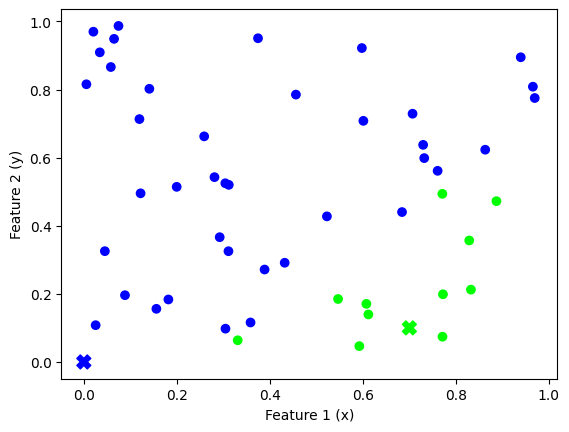

In [52]:
# create the k-NN classifier and fit it to the data

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X, y)

# generate some test points
X_test = np.array([[0.7, 0.1], [0, 0]])

# make predictions on the test points
y_pred = clf.predict(X_test)

print(y_pred)

# plot the test points and their predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.brg, marker='X', s=100)
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.show()

## Visualizing the decision boundary of the model

To visualize the decision boundary of the KNN model, we can create a mesh grid of points covering the entire feature space and use the model to predict the class of each point on the grid. We can then plot the grid with a color map that shows the predicted class of each point.

we are incrementing and decrementing the min and the max value by 0.1 is because to add a little bit of padding to the plot, so that the points are not plotted right at the edges. 

np.arrange() is similar to python's range() function but it returns Numpy list instead of a normal list.

h - is space between the points

np.meshgrid turns this: 

x_range = [-0.09447788 -0.08447788 -0.07447788 ...]
y_range = [-0.05354959 -0.04354959 -0.03354959 ...]

into this:

xx = [
        [-0.09447788 -0.08447788 -0.07447788 ...  1.04552212  1.05552212 1.06552212]
        [-0.09447788 -0.08447788 -0.07447788 ...  1.04552212  1.05552212 1.06552212]
      ]

yy = [
    [-0.05354959 -0.05354959 -0.05354959 ... -0.05354959 -0.05354959
      -0.05354959]
    [-0.04354959 -0.04354959 -0.04354959 ... -0.04354959 -0.04354959
      -0.04354959]
     ]

np.ravel is equal to JS's array.flat()

[[-0.05354959 -0.05354959 -0.05354959 ... -0.05354959 -0.05354959
  -0.05354959]
 [-0.04354959 -0.04354959 -0.04354959 ... -0.04354959 -0.04354959
  -0.04354959]
 [-0.03354959 -0.03354959 -0.03354959 ... -0.03354959 -0.03354959
  -0.03354959]
 ...
 [ 1.06645041  1.06645041  1.06645041 ...  1.06645041  1.06645041
   1.06645041]
 [ 1.07645041  1.07645041  1.07645041 ...  1.07645041  1.07645041
   1.07645041]
 [ 1.08645041  1.08645041  1.08645041 ...  1.08645041  1.08645041
   1.08645041]]


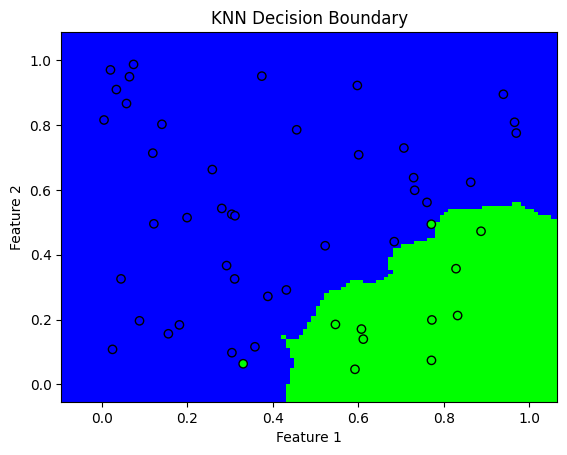

In [39]:
# Create a mesh grid
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# so basically the code above just generates bunch of dots on the image and after that below code predicts each of them 

# Use the model to predict the class of each point on the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the grid with a color map that shows the predicted class of each point
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.brg)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()